In [22]:
from __future__  import print_function, division
__author__ = 'Chongyang (Connor) Chen, NYU CUSP, Class of 2016'
import pylab as pl
import pandas as pd
import numpy as np
import pandas as pd
import os
%pylab inline
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

Populating the interactive namespace from numpy and matplotlib


In [23]:
os.getenv ('PUI2016')

'/home/cusp/cc5502/PUI2016'

In [24]:
os.getenv ('PUIDATA')

'/home/cusp/cc5502/PUIdata'

# IDEA:
## Women spend more time in each trip than men

# NULL HYPOTHESIS:
## The average time women spent biking for each trip is _the same_ or _higher_  than the average time men spent biking for each trip

# H0: tripduration_female <= tripduration_male
# Ha: tripduration_female > tripduration_male


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [38]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA")) ##you have to make a new file directory first 
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "/ -/ Citi/ Bike/ trip/ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
    os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [52]:
datestring = '201507'
getCitiBikeCSV(datestring)

file in place, you can continue


In [49]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,2015-07-01 00:00:03
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,2015-07-01 00:00:06
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,2015-07-01 00:00:17
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,2015-07-01 00:00:23
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,2015-07-01 00:00:44


In [53]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [54]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [55]:
df.head()

,tripduration,gender,date
0,732,1,2015-07-01 00:00:03
1,322,1,2015-07-01 00:00:06
2,790,1,2015-07-01 00:00:17
3,1228,1,2015-07-01 00:00:23
4,1383,1,2015-07-01 00:00:44


In [77]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)] #leaving out the outliers
males = reject_outliers(df['tripduration'][df['gender'] == 1])
females = reject_outliers(df['tripduration'][df['gender'] == 2])
m_means = males.mean()
f_means = females.mean()

719.442360823


(array([  5.77509000e+05,   9.72340000e+04,   9.85200000e+03,
          1.10100000e+03,   3.67000000e+02,   2.23000000e+02,
          1.41000000e+02,   9.80000000e+01,   4.50000000e+01,
          5.50000000e+01]),
 array([    60. ,   1140.6,   2221.2,   3301.8,   4382.4,   5463. ,
          6543.6,   7624.2,   8704.8,   9785.4,  10866. ]),
 <a list of 10 Patch objects>)

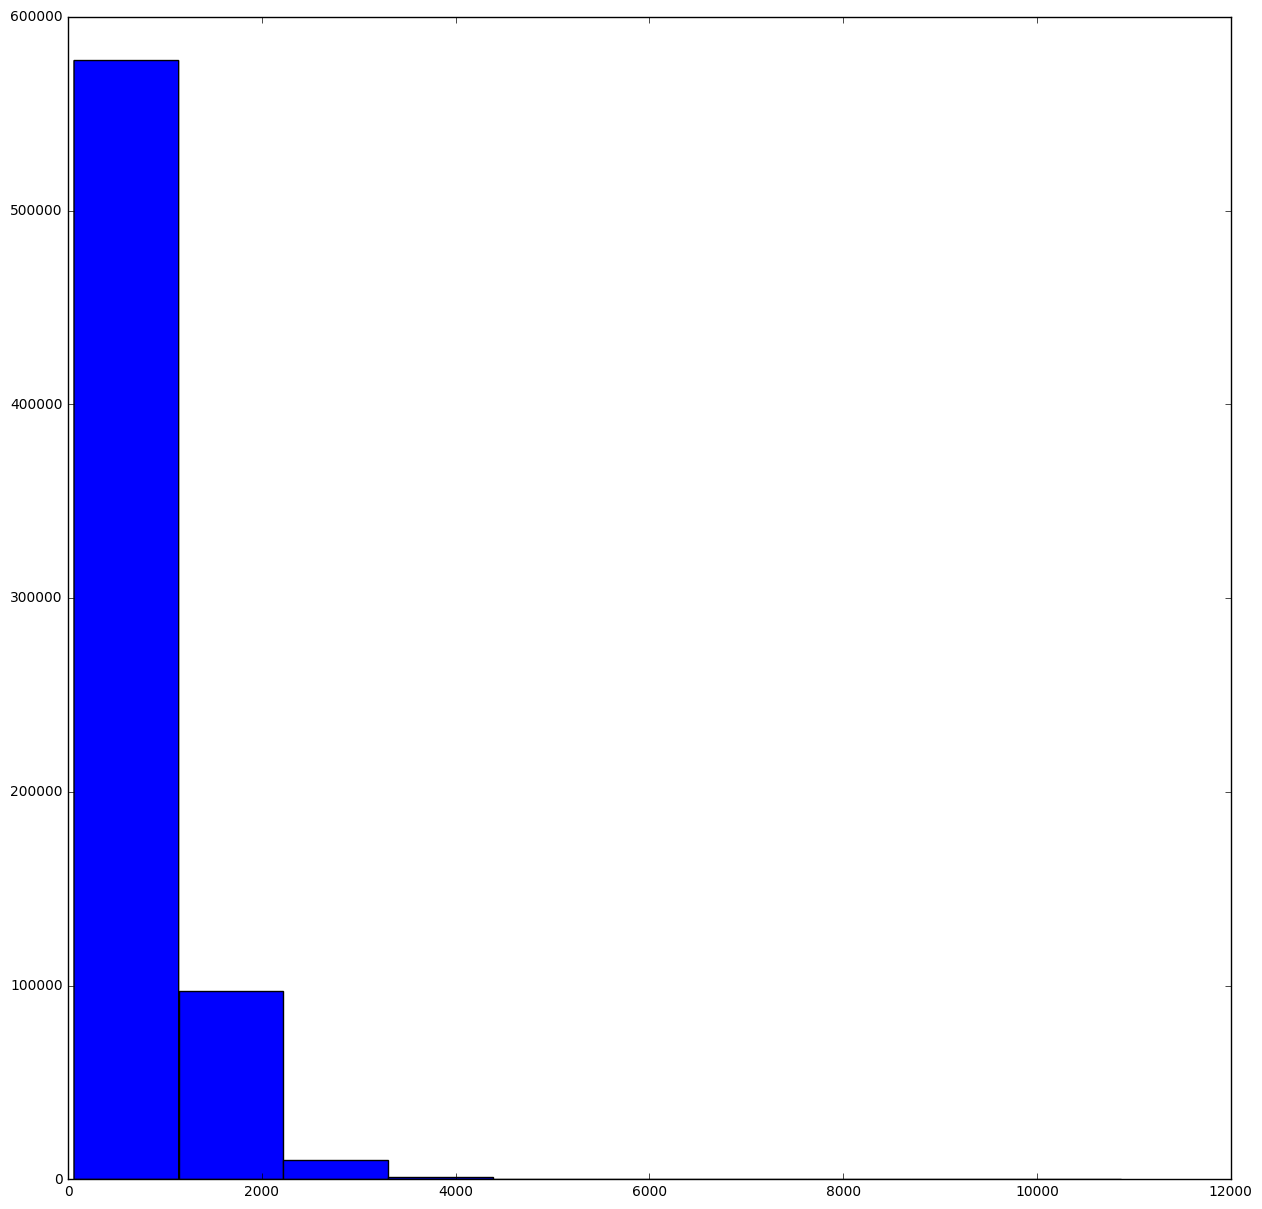

In [86]:
print(m_means)
hist(males, bins = 10)

839.696963125


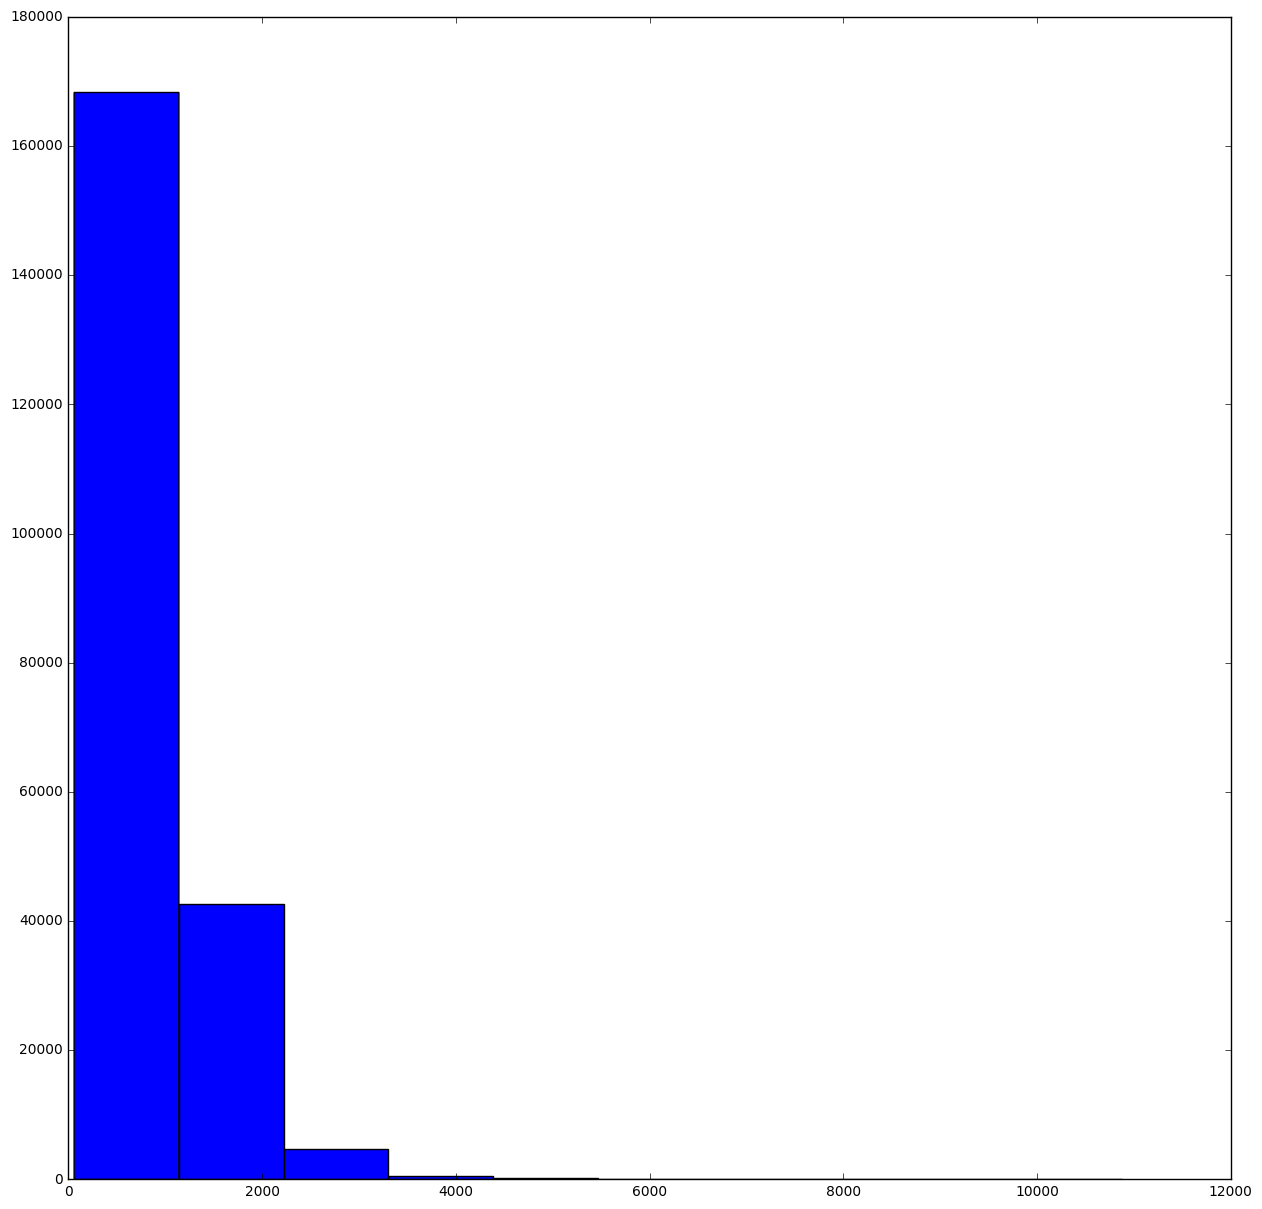

In [87]:
hist(females, bins = 10)
print(f_means)

In [89]:
z = (f_means - m_means)/(m_means.std()/np.sqrt(len(males)))
print(z)

inf


## Since z is much greater than 2, which means the mean of women's trip durations is beyond two standard deviation of that of men's, reject the null hypothsis. Based on a 95% significance level, women spend more time on average for their trips than men. 